# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import catboost

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import GridSearchCV

%config IPCompleter.greedy=True

# CSV

In [2]:
# dataset 'train' e 'test'
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Dataset train.csv

In [4]:
# Dataset information / informação do dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# verificando os valores nulos / checking for null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# verificando discrepancias no dataset / checking discrepancies in the dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Dataset test.csv

In [7]:
# Dataset information / informação do dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# verificando os valores nulos / checking for null values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# verificando discrepancias no dataset / checking discrepancies in the dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Merge dos datasets

In [10]:
passengerId = test['PassengerId']

#titanic_df = train.append(test, ignore_index = True)
# titanic_df = pd.concat([train, test])
titanic_df = train.append(test, ignore_index=True)

C:\Users\mlsil\AppData\Local\Temp\ipykernel_18744\2294733260.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = train.append(test, ignore_index=True)


In [11]:
train_index = len(train)
test_index = len(titanic_df) - len(test)

In [12]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
# Dataset information / informação do dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [14]:
# verificando os valores nulos / checking for null values
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Criando um novo DataFrame

In [16]:
df = pd.DataFrame()

# Análises

## titanic_func

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418
Quantidade por opção: 
0.0    549
1.0    342
Name: Survived, dtype: int64


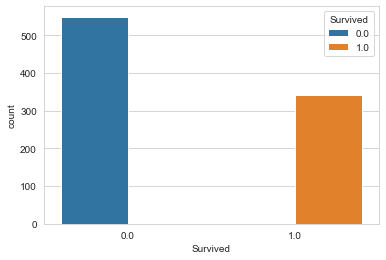

In [17]:
def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'Quantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.histplot(data[column], kde = True)

titanic_func(titanic_df, 'Survived')

## Survived column

In [18]:
titanic_df['Survived'].nunique()

2

In [19]:
titanic_df['Survived'].unique()

array([ 0.,  1., nan])

In [20]:
titanic_df['Survived'].isnull().sum()

418

In [21]:
titanic_df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

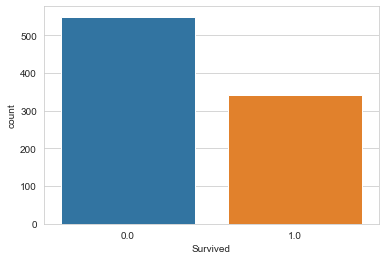

In [22]:
sns.countplot(data = titanic_df, x='Survived');

In [23]:
# Criando coluna 'Survived' e jogando os valores novos para o  novo df
df['Survived'] = titanic_df['Survived']
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


## Pclass column

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0
Quantidade por opção: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


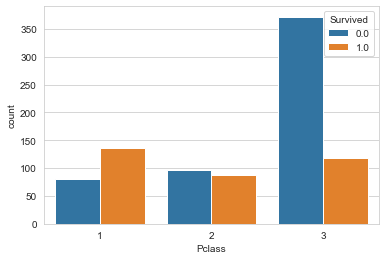

In [24]:
titanic_func(titanic_df, 'Pclass')

In [25]:
# Criando coluna 'Pclass' e jogando os valores novos para o  novo df
df['Pclass'] = titanic_df['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


In [26]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Sex column

In [27]:
# alterando as informações da coluna 'Sex'
# male = 0, famale = 1

# titanic_df['sex'].map({'female': 1, 'male': 0})
titanic_df['Sex'] = titanic_df['Sex'].replace(['male', 'female'], [0,1])

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0
Quantidade por opção: 
0    843
1    466
Name: Sex, dtype: int64


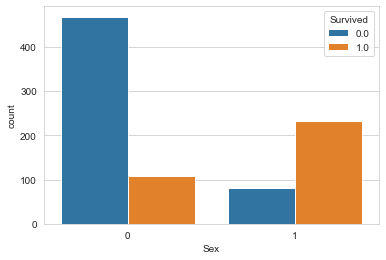

In [28]:
titanic_func(titanic_df, 'Sex')

In [29]:
# Criando coluna 'Sex' e jogando os valores novos para o  novo df 
df['Sex'] = titanic_df['Sex']
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


In [30]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## Age column

Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263
Quantidade por opção: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


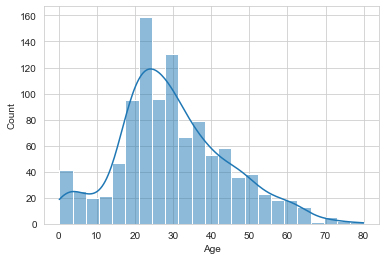

In [31]:
titanic_func(titanic_df, 'Age', False)

In [32]:
titanic_df['Age'].mean()

29.881137667304014

In [33]:
# Verificando a correlação com a melhor coluna 'Age' / Checking the correlation with the best 'Age' column
# A melhor vista foi a coluna 'Pclass' / The best view was the 'Pclass' column
titanic_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [34]:
# Média de idade das pessoas da Primeira Classe / Average age of First Class people
titanic_df[titanic_df['Pclass'] ==1]['Age'].mean()

39.15992957746479

In [35]:
# Média de idade das pessoas da Segunda Classe / Average age of Second Class people
titanic_df[titanic_df['Pclass'] ==2]['Age'].mean()

29.506704980842912

In [36]:
# Média de idade das pessoas da terceira Classe / Average age of Third Class people
titanic_df[titanic_df['Pclass'] ==3]['Age'].mean()

24.81636726546906

In [37]:
# Média de idade das pessoas das Classes /Average age of people in Classes
for i in sorted(titanic_df['Pclass'].unique()):
    print(f'Pessoas da {i}ª classe tem a média de: {titanic_df[titanic_df["Pclass"] == i]["Age"].mean():.2f}')

Pessoas da 1ª classe tem a média de: 39.16
Pessoas da 2ª classe tem a média de: 29.51
Pessoas da 3ª classe tem a média de: 24.82


In [38]:
titanic_df['Age'].isnull().sum()

263

In [39]:
titanic_df['Age'][4]

35.0

In [40]:
# Valores nulos / Null values
round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())

39

In [41]:
# Quando determinada idade estiver sem valor de idade,
# vai ser substituída pela média da classe da passagem da pessoa da coluna 'Pclass'. /

# When a given age has no age value,
# will be replaced by the average class of the person's passage from the 'Pclass' column. 

# for i in titanic_df.index:
#     if pd.isnull(titanic_df['Age'][i]):
#         if titanic_df['Pclass'][i] == 1:
#             titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())
#         elif titanic_df['Pclass'][i] == 2:
#             titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean())
#         elif titanic_df['Pclass'][i] == 3:
#             titanic_df['Age'][i] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())
#     else:
#         continue

# Solução Youtube
df_age_mean_pclass_1 = titanic_df[titanic_df['Pclass']==1].groupby('Pclass')['Age'].mean()
df_age_mean_pclass_2 = titanic_df[titanic_df['Pclass']==2].groupby('Pclass')['Age'].mean()
df_age_mean_pclass_3 = titanic_df[titanic_df['Pclass']==3].groupby('Pclass')['Age'].mean()

# Colocando o tratamento do df novo / # Placing the treatment of the new df
df['Age'] = titanic_df['Age'].fillna(titanic_df['Pclass'].map({1: df_age_mean_pclass_1.loc[1], 2: df_age_mean_pclass_2.loc[2], 3: df_age_mean_pclass_3.loc[3]}))

In [42]:
# titanic_df
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Pclass'].map({1: df_age_mean_pclass_1.loc[1], 2: df_age_mean_pclass_2.loc[2], 3: df_age_mean_pclass_3.loc[3]}))

In [43]:
# Valores nulos / Null values
titanic_df[titanic_df['Pclass'] == 1]['Age'].isnull().sum()

0

In [44]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [45]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
dtype: int64

## SibSp Column

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0
Quantidade por opção: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


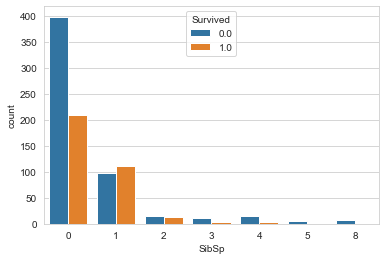

In [46]:
titanic_func(titanic_df, 'SibSp')

In [47]:
# colocando os dados no novo df / Placing the treatment of the new df
df['SibSp'] = titanic_df['SibSp']
df

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22.000000,1
1,1.0,1,1,38.000000,1
2,1.0,3,1,26.000000,0
3,1.0,1,1,35.000000,1
4,0.0,3,0,35.000000,0
...,...,...,...,...,...
1304,NaN,3,0,24.816367,0
1305,NaN,1,1,39.000000,0
1306,NaN,3,0,38.500000,0
1307,NaN,3,0,24.816367,0


## Parch Column

Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0
Quantidade por opção: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


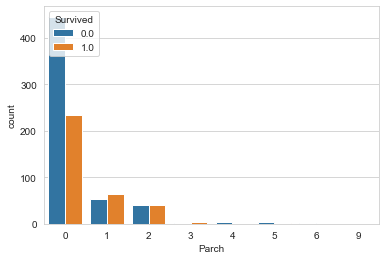

In [48]:
titanic_func(titanic_df, 'Parch')

In [49]:
# Adicionando ao novo df / Adding to new df
df['Parch'] = titanic_df['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3,0,22.000000,1,0
1,1.0,1,1,38.000000,1,0
2,1.0,3,1,26.000000,0,0
3,1.0,1,1,35.000000,1,0
4,0.0,3,0,35.000000,0,0
...,...,...,...,...,...,...
1304,NaN,3,0,24.816367,0,0
1305,NaN,1,1,39.000000,0,0
1306,NaN,3,0,38.500000,0,0
1307,NaN,3,0,24.816367,0,0


## FamilySize (New Column)

In [50]:
# Coluna criada para juntar o passageiro, e os acompanhantes das colunas 'SibSp' e 'Parch' / 
# # Column created to bring together the passenger and companions from the 'SibSp' and 'Parch' columns
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

In [51]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [52]:
# Adicionando ao novo df / Adding to new df
df['FamilySize'] = titanic_df['FamilySize']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0.0,3,0,22.000000,1,0,2
1,1.0,1,1,38.000000,1,0,2
2,1.0,3,1,26.000000,0,0,1
3,1.0,1,1,35.000000,1,0,2
4,0.0,3,0,35.000000,0,0,1
...,...,...,...,...,...,...,...
1304,NaN,3,0,24.816367,0,0,1
1305,NaN,1,1,39.000000,0,0,1
1306,NaN,3,0,38.500000,0,0,1
1307,NaN,3,0,24.816367,0,0,1


## Fare Column

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

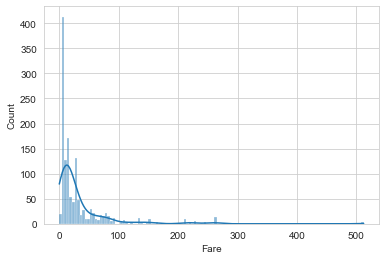

In [53]:
titanic_func(titanic_df, 'Fare', False)

In [54]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,1


In [55]:
# Média das tarifas das pessoas da terceira classe / Average fares for third class passengers
titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean()

13.302888700564969

In [56]:
# Inserindo valor ao dado nulo da coluna 'Fare' / Inserting value to null data in the 'Fare' column
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass'] == 3]['Fare'].mean(), inplace = True)

In [57]:
# verificando valores nulos / checking null values
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
FamilySize        0
dtype: int64

In [58]:
# adicionando valores a coluna df / adding values to the df column
df['Fare'] = titanic_df['Fare']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
0,0.0,3,0,22.000000,1,0,2,7.2500
1,1.0,1,1,38.000000,1,0,2,71.2833
2,1.0,3,1,26.000000,0,0,1,7.9250
3,1.0,1,1,35.000000,1,0,2,53.1000
4,0.0,3,0,35.000000,0,0,1,8.0500
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,24.816367,0,0,1,8.0500
1305,NaN,1,1,39.000000,0,0,1,108.9000
1306,NaN,3,0,38.500000,0,0,1,7.2500
1307,NaN,3,0,24.816367,0,0,1,8.0500


## Cabin Column

In [59]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,24.816367,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",0,24.816367,0,0,359309,8.0500,NaN,S,1


In [60]:
# Valores nulos / null values 
titanic_df['Cabin'].isnull().sum()

1014

In [61]:
# Valores únicos / unique values
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## Embarked Column

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2
Quantidade por opção: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


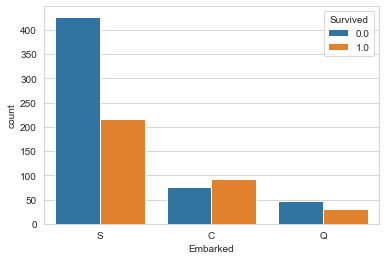

In [62]:
titanic_func(titanic_df, 'Embarked')

In [63]:
# Média de Sobreviventes da Classe "S" / "S" Class Survivor Average
titanic_df[titanic_df['Embarked'] == 'S']['Survived'].mean()

0.33695652173913043

In [64]:
# Média de Embarque das pessoas por classe / Average boarding of people by class
titanic_df[titanic_df['Embarked'] == 'S']['Pclass'].mean()

2.3479212253829322

In [65]:
# Média de Sobreviventes da Classe "C" / "C" Class Survivor Average
titanic_df[titanic_df['Embarked'] == 'C']['Survived'].mean()

0.5535714285714286

In [66]:
# Média de Embarque das pessoas por classe / Average boarding of people by class
titanic_df[titanic_df['Embarked'] == 'C']['Pclass'].mean()

1.8518518518518519

In [67]:
# Média de Sobreviventes da Classe "Q" / "Q" Class Survivor Average
titanic_df[titanic_df['Embarked'] == 'Q']['Survived'].mean()

0.38961038961038963

In [68]:
# Média de Embarque das pessoas por classe / Average boarding of people by class
titanic_df[titanic_df['Embarked'] == 'Q']['Pclass'].mean()

2.894308943089431

In [69]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1


In [70]:
# Adicionando os dois valores nulos ao 'Embarked' C / Adding the two null values to 'Embarked' C
titanic_df['Embarked'].fillna("C", inplace = True)

In [71]:
# verificando valores nulos / checking null values
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [72]:
# adicionando valores a coluna df / adding values to the df column
df['Embarked'] = titanic_df['Embarked']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,3,0,22.000000,1,0,2,7.2500,S
1,1.0,1,1,38.000000,1,0,2,71.2833,C
2,1.0,3,1,26.000000,0,0,1,7.9250,S
3,1.0,1,1,35.000000,1,0,2,53.1000,S
4,0.0,3,0,35.000000,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,24.816367,0,0,1,8.0500,S
1305,NaN,1,1,39.000000,0,0,1,108.9000,C
1306,NaN,3,0,38.500000,0,0,1,7.2500,S
1307,NaN,3,0,24.816367,0,0,1,8.0500,S


## Name Column

In [73]:
titanic_df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [74]:
# Separando Mr, Master, Miss, etc... / Separating Mr, Master, Miss, etc...
# [titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]
titanic_df['Title'] = titanic_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [75]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,24.816367,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,C,1,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,24.816367,0,0,359309,8.0500,NaN,S,1,Mr


In [76]:
titanic_df["Title"].nunique()

18

In [77]:
titanic_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [78]:
titanic_df["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [79]:
# Transformando os títulos que não são 'Mr', 'Miss', 'Mrs', 'Master', em 'Person' /
# Transforming titles that are not 'Mr', 'Miss', 'Mrs', 'Master', into 'Person'
titanic_df['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']]

In [80]:
titanic_df['Title'].isnull().sum()

0

In [81]:
titanic_df['Title'].nunique()

5

In [82]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

In [83]:
# adicionando valores a coluna df / adding values to the df column
df['Title'] = titanic_df['Title']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22.000000,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.000000,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.000000,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.000000,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.000000,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,24.816367,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39.000000,0,0,1,108.9000,C,Person
1306,NaN,3,0,38.500000,0,0,1,7.2500,S,Mr
1307,NaN,3,0,24.816367,0,0,1,8.0500,S,Mr


Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0
Quantidade por opção: 
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: Title, dtype: int64


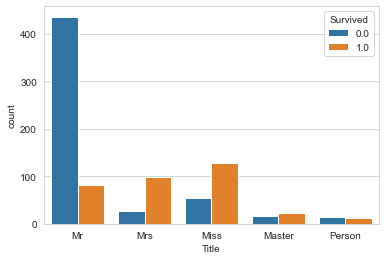

In [84]:
titanic_func(titanic_df, 'Title')

# Train Test Split

## get_Dummies

In [85]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Title
0,0.0,3,0,22.000000,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.000000,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.000000,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.000000,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.000000,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,24.816367,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39.000000,0,0,1,108.9000,C,Person
1306,NaN,3,0,38.500000,0,0,1,7.2500,S,Mr
1307,NaN,3,0,24.816367,0,0,1,8.0500,S,Mr


In [86]:
# get dummies, transformando as variáveis em 0 e 1 / get dummies, transforming the variables into 0 and 1
pclass   = pd.get_dummies(df['Pclass'], prefix = 'Pclass', drop_first = True)
title    = pd.get_dummies(df['Title'], prefix = 'Title', drop_first = True)
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True)

In [87]:
# concatenando o dataframe novo, junto com o get_dummies, formando outro dataframe / 
# concatenating the new dataframe, together with get_dummies, forming another dataframe
titanic_completo = pd.concat([df, title, embarked], axis = 1)

In [88]:
# 
titanic_completo.drop(['Pclass', 'Title', 'Embarked'], axis = 1, inplace = True)

In [89]:
titanic_completo

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0,22.000000,1,0,2,7.2500,0,1,0,0,0,1
1,1.0,1,38.000000,1,0,2,71.2833,0,0,1,0,0,0
2,1.0,1,26.000000,0,0,1,7.9250,1,0,0,0,0,1
3,1.0,1,35.000000,1,0,2,53.1000,0,0,1,0,0,1
4,0.0,0,35.000000,0,0,1,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,24.816367,0,0,1,8.0500,0,1,0,0,0,1
1305,NaN,1,39.000000,0,0,1,108.9000,0,0,0,1,0,0
1306,NaN,0,38.500000,0,0,1,7.2500,0,1,0,0,0,1
1307,NaN,0,24.816367,0,0,1,8.0500,0,1,0,0,0,1


## train test split

In [90]:
# cópia do df original / copy of the original df
train = titanic_completo[:train_index].copy()
test = titanic_completo[test_index:].copy()

In [91]:
# Trocando a coluna 'Survived' para int / Changing the 'Survived' column to int
train['Survived'] = train['Survived'].astype(int)

In [92]:
train

,Survived,Sex,Age,SibSp,Parch,FamilySize,Fare,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0,0,22.000000,1,0,2,7.2500,0,1,0,0,0,1
1,1,1,38.000000,1,0,2,71.2833,0,0,1,0,0,0
2,1,1,26.000000,0,0,1,7.9250,1,0,0,0,0,1
3,1,1,35.000000,1,0,2,53.1000,0,0,1,0,0,1
4,0,0,35.000000,0,0,1,8.0500,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.000000,0,0,1,13.0000,0,0,0,1,0,1
887,1,1,19.000000,0,0,1,30.0000,1,0,0,0,0,1
888,0,1,24.816367,1,2,4,23.4500,1,0,0,0,0,1
889,1,0,26.000000,0,0,1,30.0000,0,1,0,0,0,0


In [93]:
# Treinando a coluna 'Survived' / Training the 'Survived' column
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [94]:
X_test = test.drop('Survived', axis = 1)

## Função para testar os algorítmos

In [95]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vc

# Models

## RandomForestClassifier

In [96]:
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 10)
print(f"Acurácia: {acc_rf}")
print(f"Acurácia Validação cruzada: {acc_vc_rf}")

Acurácia: 98.43
Acurácia Validação cruzada: 80.36


## Logistic Regression

In [97]:
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter = 1000), X, y, 10)
print(f"Acurácia: {acc_log}")
print(f"Acurácia Validação cruzada: {acc_vc_log}")

Acurácia: 82.94
Acurácia Validação cruzada: 82.04


## K-Nearest Neighbours

In [98]:
acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)
print(f"Acurácia: {acc_knn}")
print(f"Acurácia Validação cruzada: {acc_vc_knn}")

Acurácia: 80.7
Acurácia Validação cruzada: 72.95


## Gaussian Naive Bayes

In [99]:
acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)
print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia Validação cruzada: {acc_vc_gaussian}")

Acurácia: 78.68
Acurácia Validação cruzada: 78.23


## Linear Support Vector Machines (SVC)

In [100]:
acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual = False), X, y, 10)
print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia Validação cruzada: {acc_vc_linear_svc}")

Acurácia: 82.72
Acurácia Validação cruzada: 82.27


## Stochastic Gradient Descent

In [101]:
acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)
print(f"Acurácia: {acc_sgd}")
print(f"Acurácia Validação cruzada: {acc_vc_sgd}")

Acurácia: 73.85
Acurácia Validação cruzada: 68.8


## Decision Tree Classifier

In [102]:
acc_dtc, acc_vc_dtc = func_acuracia(DecisionTreeClassifier(), X, y, 10)
print(f"Acurácia: {acc_dtc}")
print(f"Acurácia Validação cruzada: {acc_vc_dtc}")

Acurácia: 98.43
Acurácia Validação cruzada: 78.9


## Gradient Boost Trees

In [103]:
acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)
print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação cruzada: {acc_vc_gbt}")

Acurácia: 88.89
Acurácia Validação cruzada: 83.5


# Get Params

In [104]:
params = dict(
    max_depth = [n for n in range(1, 5)],
    min_samples_split = [n for n in range(2, 6)],
    min_samples_leaf = [n for n in range(2 ,6)],
    n_estimators = [n for n in range(10, 50, 10)]
)
gbc = GradientBoostingClassifier()

In [105]:
# Utilizando GridSearchCV
gbc_vc = GridSearchCV(estimator = gbc, param_grid = params, cv = 10)

In [106]:
gbc_vc.fit(X, y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [107]:
print(f"Melhor Pontuação: {gbc_vc.best_score_}")
print(f"Melhores Parãmetros: {gbc_vc.best_estimator_}")

Melhor Pontuação: 0.8384269662921348
Melhores Parãmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, n_estimators=40)


In [108]:
#
gradientBoostingClassifier_pred = gbc_vc.predict(X_test)

In [109]:
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': gradientBoostingClassifier_pred})

In [110]:
# Enviando resultados das análises para o Kaggle / Sending analysis results to Kaggle
# kaggle.to_csv('titanic_gradient_boosting_pred.csv', index = False)